In [1]:
import os
path = os.path.join('/home/santiago/Documents/dev/reservoirpy')
import sys
sys.path.insert(0,path)

import numpy as np
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from reservoirpy.wellproductivitypy import decline as dc

# Forecast using WOR vs Np Relationship

The forecasting method using WOR vs Np relationship can be estimated by creating the `wor_declination` object. Its attributes are: The slope of the `ln(wor+1)/Np`; Initial Bsw `bsw_i`. 

In [2]:
# wor_declination initialized with Initial Bsw 
w = dc.wor_declination(slope=2e-6,bsw_i=0.75)


In [3]:
print('Attributes of object initialized with bsw_i')
print(w.bsw_i)
print(w.wor_i)


Attributes of object initialized with bsw_i
0.75
3.0


## Forecast method


In [4]:
f= w.forecast(
    start_date=date(2020,5,21), 
    end_date=date(2025,6,21),
    fq='M', 
    fluid_rate=5000)
f

(              qf           qo           qw       bsw      wor_1        wor  \
 time                                                                         
 2020-05-31  5000  1250.000000  3750.000000  0.750000   4.000000   3.000000   
 2020-06-30  5000  1246.878903  3753.121097  0.750624   4.010013   3.010013   
 2020-07-31  5000  1157.000427  3842.999573  0.768600   4.321520   3.321520   
 2020-08-31  5000  1076.911035  3923.088965  0.784618   4.642909   3.642909   
 2020-09-30  5000  1007.355224  3992.644776  0.798529   4.963492   3.963492   
 ...          ...          ...          ...       ...        ...        ...   
 2025-01-31  5000   237.918485  4762.081515  0.952416  21.015601  20.015601   
 2025-02-28  5000   234.434720  4765.565280  0.953113  21.327899  20.327899   
 2025-03-31  5000   231.377095  4768.622905  0.953725  21.609745  20.609745   
 2025-04-30  5000   228.081596  4771.918404  0.954384  21.921979  20.921979   
 2025-05-31  5000   224.981583  4775.018417  0.95500

# Forecast with different fluid Rate

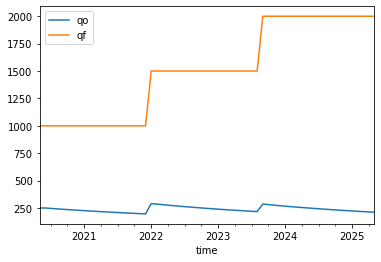

In [5]:
f,cum= w.forecast(
    start_date=date(2020,5,21), 
    end_date=date(2025,6,21),
    fq='M', 
    fluid_rate=np.array([1000]*20 + [1500]*20 + [2000]*21))
f.plot(y=['qo','qf'])

## Set start_date and end date

In [6]:
# wor_declination initialized with Initial Bsw 
w1 = dc.wor_declination(slope=2e-6,bsw_i=0.05, start_date = date(2020,1,1), end_date=date(2021,1,1))

w1.forecast(fluid_rate=5000,fq='M')



(              qf           qo           qw       bsw     wor_1       wor  \
 time                                                                       
 2020-01-31  5000  4750.000000   250.000000  0.050000  1.052632  0.052632   
 2020-02-29  5000  4705.088667   294.911333  0.058982  1.062679  0.062679   
 2020-03-31  5000  3581.384564  1418.615436  0.283723  1.396108  0.396108   
 2020-04-30  5000  2868.254431  2131.745569  0.426349  1.743221  0.743221   
 2020-05-31  5000  2414.780437  2585.219563  0.517044  2.070582  1.070582   
 2020-06-30  5000  2079.010334  2920.989666  0.584198  2.404990  1.404990   
 2020-07-31  5000  1835.196132  3164.803868  0.632961  2.724504  1.724504   
 2020-08-31  5000  1637.825094  3362.174906  0.672435  3.052829  2.052829   
 2020-09-30  5000  1479.677330  3520.322670  0.704065  3.379115  2.379115   
 2020-10-31  5000  1353.973231  3646.026769  0.729205  3.692835  2.692835   
 2020-11-30  5000  1244.952110  3755.047890  0.751010  4.016219  3.016219   

# Lims

In [7]:
# wor_declination initialized with Initial Bsw 
w2 = dc.wor_declination(slope=2e-6,bsw_i=0.05, start_date = date(2020,1,1), end_date=date(2021,1,1))

w2.forecast(fluid_rate=5000,fq='M', np_limit=6e5, wor_limit=2)

(              qf           qo           qw       bsw     wor_1       wor  \
 time                                                                       
 2020-01-31  5000  4750.000000   250.000000  0.050000  1.052632  0.052632   
 2020-02-29  5000  4705.088667   294.911333  0.058982  1.062679  0.062679   
 2020-03-31  5000  3581.384564  1418.615436  0.283723  1.396108  0.396108   
 2020-04-30  5000  2868.254431  2131.745569  0.426349  1.743221  0.743221   
 2020-05-31  5000  2414.780437  2585.219563  0.517044  2.070582  1.070582   
 2020-06-30  5000  2079.010334  2920.989666  0.584198  2.404990  1.404990   
 2020-07-31  5000  1835.196132  3164.803868  0.632961  2.724504  1.724504   
 2020-08-31  5000  1637.825094  3362.174906  0.672435  3.052829  2.052829   
 
                        np  
 time                       
 2020-01-31    4750.000000  
 2020-02-29  141197.571332  
 2020-03-31  252220.492818  
 2020-04-30  338268.125736  
 2020-05-31  413126.319280  
 2020-06-30  475496.62929

In [8]:
# wor_declination initialized with Initial Bsw 
w3 = dc.wor_declination(slope=2e-6,bsw_i=0.05, start_date = date(2020,1,1), end_date=date(2021,1,1), fluid_rate=8000)

w3.forecast()

(              qf           qo           qw       bsw     wor_1       wor  \
 time                                                                       
 2020-01-31  8000  7600.000000   400.000000  0.050000  1.052632  0.052632   
 2020-02-29  8000  7485.353521   514.646479  0.064331  1.068754  0.068754   
 2020-03-31  8000  4849.122414  3150.877586  0.393860  1.649783  0.649783   
 2020-04-30  8000  3589.999824  4410.000176  0.551250  2.228412  1.228412   
 2020-05-31  8000  2894.325697  5105.674303  0.638209  2.764029  1.764029   
 2020-06-30  8000  2418.878422  5581.121578  0.697640  3.307318  2.307318   
 2020-07-31  8000  2092.106107  5907.893893  0.738487  3.823898  2.823898   
 2020-08-31  8000  1837.600578  6162.399422  0.770300  4.353503  3.353503   
 2020-09-30  8000  1639.726486  6360.273514  0.795034  4.878862  3.878862   
 2020-10-31  8000  1486.086065  6513.913935  0.814239  5.383268  4.383268   
 2020-11-30  8000  1355.280611  6644.719389  0.830590  5.902837  4.902837   